<a href="https://www.kaggle.com/code/noraibraheem/fashion-mnist?scriptVersionId=102836893" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Fashion_MNIST with NN

### Business Question

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

### Importing

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(X_train_full, y_train_full), (x_test, y_test) = load_data('../input/mnist-numpy/mnist.npz')

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
y_train_full.shape

(60000,)

In [6]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
#we need to the list of class names to know what are dealing with
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Sneaker'

In [10]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Creating the model

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"));

2022-08-08 20:48:05.688873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 20:48:05.810830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 20:48:05.811796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 20:48:05.813638: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
model.layers

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compiling the model-->matrics=accuracy means it's useful to measure its accuracy during training and evaluation
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

1. regression:predict one target proability per class for each instance
loss=categorical_crossentropy
2. classification: loss="binary_crossentropy"
3. multiclassification: loss="sparse_categorical_crossentropy because we have sparse labels

In [15]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

2022-08-08 20:48:09.049365: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5975 - accuracy: 0.8511 - val_loss: 0.3115 - val_accuracy: 0.9144
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2896 - accuracy: 0.9177 - val_loss: 0.2468 - val_accuracy: 0.9308
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2387 - accuracy: 0.9319 - val_loss: 0.2085 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2040 - accuracy: 0.9421 - val_loss: 0.1784 - val_accuracy: 0.9486
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1776 - accuracy: 0.9493 - val_loss: 0.1614 - val_accuracy: 0.9542
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1570 - accuracy: 0.9552 - val_loss: 0.1466 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1401 - accuracy: 0.9598 - val_loss: 0.1376 - val_accuracy:

### Evaluation

In [16]:
val_loss,val_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 12.9420 - accuracy: 0.9772


In [17]:
print(val_loss)
print(val_acc*100)

12.941969871520996
97.71999716758728


> * if you aren't satisfied with the performance of the model, we should go back to tune the model hyperparameters ex) the n.layers,n.neurons per layer , the type of activation function , n.epochs
* if we are satisfied by validation accuracy and the accuracy of model So we should evaluate the modelon test set to estimate the generalization error

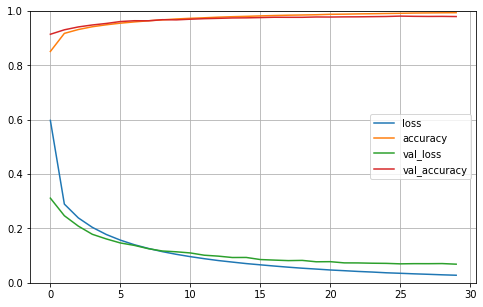

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

> the training and validation accuracy increase during training while training and validation loss decreases (it means that there's not much overfitting the model performed well

We can predict the class for new data instances using our finalized classification model in Keras using the predict_classes() function. Note that this function is only available on Sequential models, not those models developed using the functional API.

### Prediction

In [19]:
y_pred = model.predict(x_test)

In [20]:
y_pred = np.argmax(model.predict(x_test[:3]), axis=1)

In [21]:
y_pred

array([7, 2, 1])

In [22]:
np.array(class_names)[y_pred]

array(['Sneaker', 'Pullover', 'Trouser'], dtype='<U11')